<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Polynomial Regression


Estimated time needed: **40** minutes

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

There are two factors when determining model performance: overfitting and underfitting. Overfitting is when the model is too complex and does well on the training data but not on the test data. Underfitting is when the model is too simple and performs poorly on the training and testing data sets. 

Overfitting is simple to deal with, using methods like regularization, which we will discuss in the next lab. To deal with underfitting, we can build a more complex model using methods like polynomial regression. If making a more complex model does not work, this may involve using more data to train the model on or obtaining new features. As this process is complex, it's better to determine if the model can overfit the data first. Therefore, in this section, we will use Polynomial Regression to overfit the data to determine if we have an adequate amount of data.

In this notebook, we will explore Polynomial Regression and perform polynomial transform using individual features as well as multiple features.


## Objectives

After completing this lab you will be able to:

*   Understand the concept of  overfitting versus underfitting
*   Apply polynomial transforms to data 
*   Perform  hyperparameters grid search on a model, using validation data 



***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`numpy`](https://numpy.org/) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/) for statistical computations.


## **Import the required libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
#!pip install -U scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [4]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

The function below will calculate the $R^{2}$ on each feature given the a input model.


In [44]:
def get_R2_features(model, test=True):  
    # Hàm này tính và hiển thị hệ số R² cho từng biến độc lập (feature)
    # để đánh giá mức độ giải thích của từng feature riêng lẻ đối với biến mục tiêu

    # Giả sử X là DataFrame toàn cục chứa các biến độc lập
    features = list(X)
    features.remove("three")  # Loại bỏ cột "three" khỏi danh sách (nếu không cần đánh giá)

    R_2_train = []  # Danh sách lưu giá trị R² của tập huấn luyện
    R_2_test = []   # Danh sách lưu giá trị R² của tập kiểm tra

    # Huấn luyện mô hình với từng biến độc lập riêng lẻ
    for feature in features:
        model.fit(X_train[[feature]], y_train)  # Huấn luyện chỉ với 1 feature
        R_2_test.append(model.score(X_test[[feature]], y_test))   # Tính R² trên tập test
        R_2_train.append(model.score(X_train[[feature]], y_train))  # Tính R² trên tập train

    # Vẽ biểu đồ cột so sánh R² giữa train và test cho từng feature
    plt.bar(features, R_2_train, label="Train")
    plt.bar(features, R_2_test, label="Test")
    plt.xticks(rotation=90)  # Xoay nhãn trục X cho dễ đọc
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()

    # In giá trị trung bình và lớn nhất của R² cho train và test
    print("Training R² mean value {} | Testing R² mean value {}".format(
        str(np.mean(R_2_train)), str(np.mean(R_2_test))))
    print("Training R² max value {} | Testing R² max value {}".format(
        str(np.max(R_2_train)), str(np.max(R_2_test))))


The function below will plot the distribution of two inputs.


In [46]:
def plot_dis(y, yhat):
    # Hàm vẽ biểu đồ phân bố (distribution plot) so sánh giữa giá trị thực và giá trị dự đoán

    plt.figure()  # Tạo khung vẽ mới

    # Vẽ đường phân bố của giá trị thực (màu đỏ)
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")

    # Vẽ đường phân bố của giá trị dự đoán (màu xanh) trên cùng trục
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

    plt.legend()  # Hiển thị chú thích

    # Gắn tiêu đề và nhãn trục
    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()   # Hiển thị biểu đồ
    plt.close()  # Đóng biểu đồ sau khi vẽ (tránh chồng lấn khi vẽ nhiều biểu đồ)


## **Reading and understanding our data**


For this lab, we will be using the car sales dataset, hosted on IBM Cloud object storage. This dataset can also be found and downloaded from [kaggle.com](https://www.kaggle.com/datasets/goyalshalini93/car-data), an open public data source.
The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.

This dataset has already been pre-cleaned and encoded (using one-hot and label encoders) in the Linear Regression Notebook.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [47]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv')
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


We can find more information about the features and types using the `info()`  method.


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

We have 35 features in our dataset after the one hot encoding. 

Before we begin our polynomial analysis, let's visualize some of the relationships between our features and the target variable, 'price'.


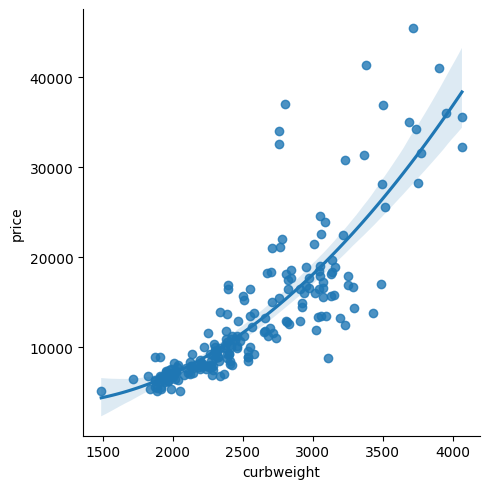

In [49]:
# Vẽ biểu đồ hồi quy giữa trọng lượng xe (curbweight) và giá xe (price)
# 'order=2' nghĩa là dùng hồi quy bậc hai (parabolic curve)
sns.lmplot(x='curbweight', y='price', data=data, order=2)


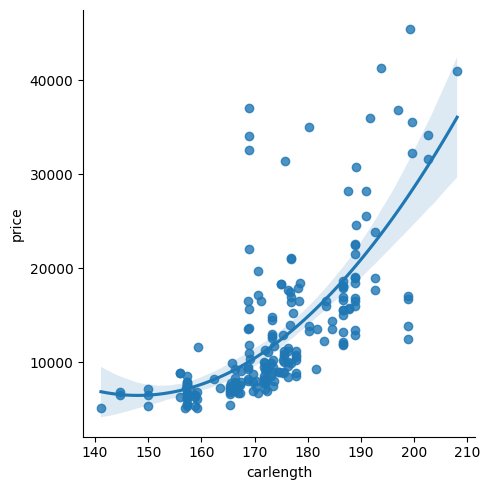

In [50]:
# Vẽ biểu đồ hồi quy thể hiện mối quan hệ giữa chiều dài xe (carlength) và giá xe (price)
# order=2: sử dụng mô hình hồi quy bậc hai để thể hiện xu hướng phi tuyến tính
sns.lmplot(x='carlength', y='price', data=data, order=2)


The relationship is more curved.


## Exercise 1
In this Exercise, visualize the relationship between the 'horsepower' and the target variable, 'price'.


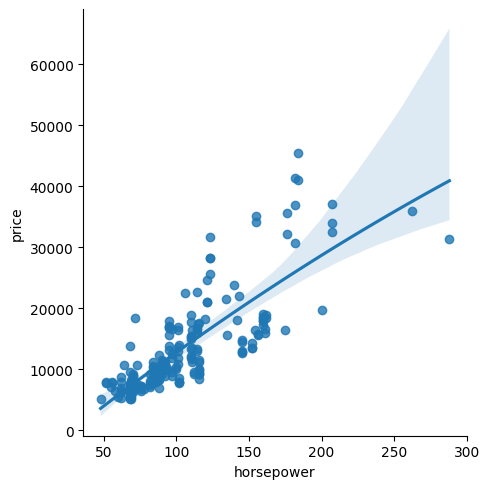

In [51]:
# Enter your code and run the cell

# Vẽ biểu đồ hồi quy giữa công suất động cơ (horsepower) và giá xe (price)
# order=2: dùng đường cong hồi quy bậc hai để thể hiện mối quan hệ phi tuyến
sns.lmplot(x='horsepower', y='price', data=data, order=2)




<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
    
sns.lmplot(x = 'horsepower', y = 'price', data = data, order=2)
    
```
</details>


## Data Preparation

Let's first split our data into ```X``` features and ```y``` target.


In [52]:
X = data.drop('price', axis=1)
y = data.price

## Train Test Split 


Now that we have split our data into training and testing sets, the training data is used for your model to recognize patterns using some criteria,the test data set it used to evaluate your model, as shown in the following image:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/images/trin-test.png">
</center>
<center>source scikit-learn.org</center>


Now, we split our data, using <code>train_test_split</code> function, into the training and testing sets, allocating 30% of the data for testing.


In [53]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70% train, 30% test)
# random_state=42 giúp tái lập kết quả chia dữ liệu giống nhau mỗi lần chạy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# In số lượng mẫu trong tập kiểm tra và huấn luyện
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])


Number of test samples: 62
Number of training samples: 143


### Multiple Features


Let's create a <code>LinearRegression</code> object, called `lm`. 


In [54]:
lm = LinearRegression()

Now, let's fit the model with multiple features on our X_train and y_train data.


In [55]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We apply `predict(`) function on the testing data set.


In [ ]:
# Dự đoán giá trị đầu ra (y) cho tập kiểm tra bằng mô hình hồi quy đã huấn luyện
predicted = lm.predict(X_test)


Let's calculate the `r2_score()` on both, training and testing data sets.


In [17]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9262722224294516
R^2 on testing data  0.8471124710251037


We can plot distributions of the predicted values versus the actual values. 


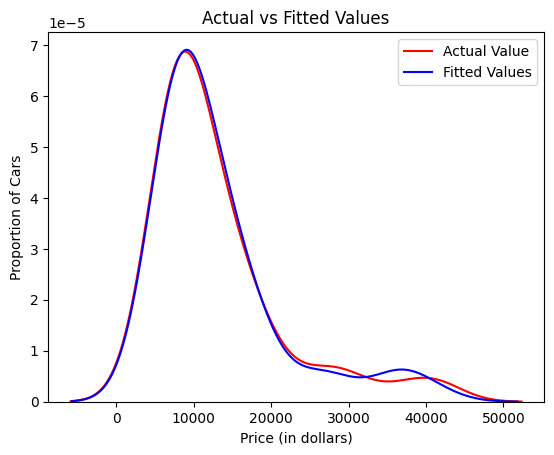

In [56]:
# Gọi hàm plot_dis để vẽ biểu đồ so sánh phân bố giữa
# giá trị thực tế (y_test) và giá trị dự đoán (predicted)
plot_dis(y_test, predicted)


Below, we will view the estimated coefficients for the linear regression problem.


In [57]:
# Tạo dictionary chứa tên cột và hệ số hồi quy tương ứng của mô hình
# Giúp xem mỗi biến đầu vào (feature) ảnh hưởng thế nào đến kết quả dự đoán
{col: coef for col, coef in zip(X.columns, lm.coef_)}


{'diesel': np.float64(771.2244282216632),
 'gas': np.float64(-771.2244282217308),
 'std': np.float64(304.3744402627444),
 'turbo': np.float64(-304.3744402624631),
 'convertible': np.float64(1786.6475218544365),
 'hardtop': np.float64(3165.452040175104),
 'hatchback': np.float64(-1770.7658370224954),
 'sedan': np.float64(-687.684349419452),
 'wagon': np.float64(-2493.6493755876545),
 '4wd': np.float64(-605.6774561377667),
 'fwd': np.float64(-270.98795084517593),
 'rwd': np.float64(876.6654069829411),
 'dohc': np.float64(2467.021749103305),
 'dohcv': np.float64(-13286.459963401843),
 'l': np.float64(2148.2366151877623),
 'ohc': np.float64(4642.428500906303),
 'ohcf': np.float64(6068.751775254842),
 'ohcv': np.float64(-2819.952770541051),
 'rotor': np.float64(779.9740934906432),
 'eight': np.float64(9218.442191882195),
 'five': np.float64(-2742.7285350017155),
 'four': np.float64(-5338.369710830738),
 'six': np.float64(-2146.2003214664305),
 'three': np.float64(1.8189894035458565e-12),
 '

As we see, the first two coefficients are too large to plot, so we'll drop them and plot the rest of the coefficients.


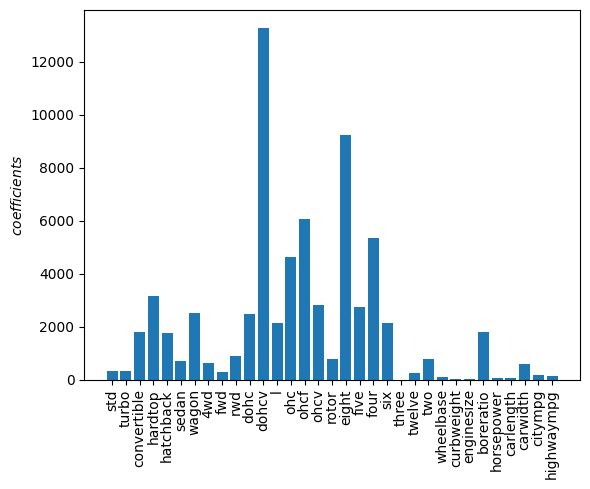

In [58]:
# Vẽ biểu đồ cột thể hiện độ lớn (giá trị tuyệt đối) của các hệ số hồi quy
# Bắt đầu từ cột thứ 3 (bỏ qua 2 cột đầu, có thể là bias hoặc biến không cần so sánh)
plt.bar(X.columns[2:], abs(lm.coef_[2:]))

# Xoay nhãn trục X để dễ đọc hơn
plt.xticks(rotation=90)

# Gắn nhãn cho trục Y
plt.ylabel("$coefficients$")

# Hiển thị biểu đồ
plt.show()


Usually, we can interpret the lager coefficients as having more importance on the prediction, but this is not always the case, so let's look at the individual features. 


### Individual Features 


We can train the model and plot our $R^2$ for each of the features on the training and testing data sets, using the function <code>get_R2_features</code>.


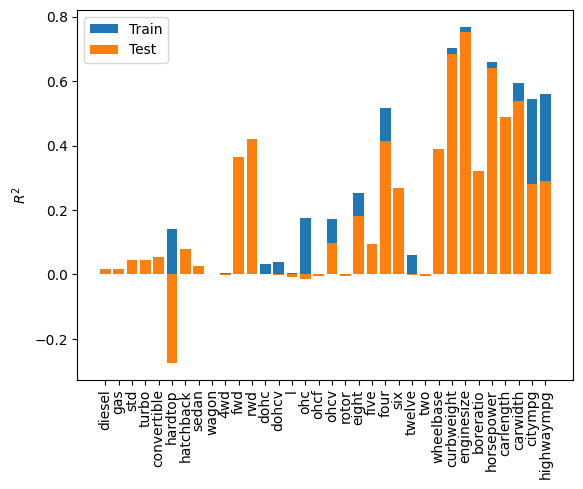

Training R² mean value 0.21817773426877915 | Testing R² mean value 0.18241493035139267
Training R² max value 0.7686929078033781 | Testing R² max value 0.7534902447506853


In [59]:
# Gọi hàm get_R2_features để tính và hiển thị hệ số R²
# cho từng biến độc lập (feature) riêng lẻ bằng mô hình hồi quy 'lm'
get_R2_features(lm)


From the above plot, we see that some individual features perform similarly to  using all the features (we removed the feature ```three``` ), in  addition, we see that smaller coefficients seem to correspond to a larger $R^{2}$, therefore  larger coefficients correspond to overfiting.


## Exercise 2
In this Exercise, calculate the $R^2$ using the object Pipeline for  Linear Regression and apply ```StandardScaler()``` to all features, then use the function ```plot_dis``` to compare the predicted values versus the actual values.


R^2 on training data: 0.9262722224294516
R^2 on testing data: 0.8419174509630337


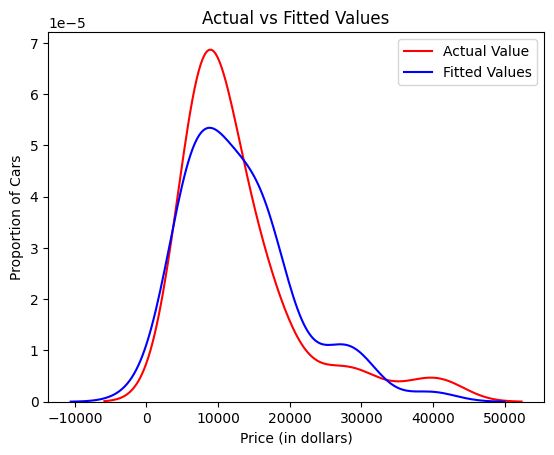

In [60]:
# Enter your code and run the cell

# Tạo pipeline gồm 2 bước:
# 1. Chuẩn hóa dữ liệu bằng StandardScaler (đưa các feature về cùng thang đo)
# 2. Huấn luyện mô hình hồi quy tuyến tính LinearRegression
pipe = Pipeline([
    ('ss', StandardScaler()), 
    ('lr', LinearRegression())
])

# Huấn luyện pipeline trên tập huấn luyện
pipe.fit(X_train, y_train)

# In hệ số R² (độ phù hợp mô hình) trên tập huấn luyện và tập kiểm tra
print("R^2 on training data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test, y_test))

# Dự đoán giá trị đầu ra trên tập kiểm tra
predicted = pipe.predict(X_test)

# Vẽ biểu đồ so sánh phân bố giữa giá trị thật và giá trị dự đoán
plot_dis(y_test, predicted)



<details>
<summary><strong>Solution</strong> (Click Here)</summary>
 ```python
    
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)
    
```
</details>


## Exercise 3
In this Exercise, calculate the $R^2$ using the object Pipeline with  ```StandardScaler()``` for each individual features using the function ```get_R2_features```.


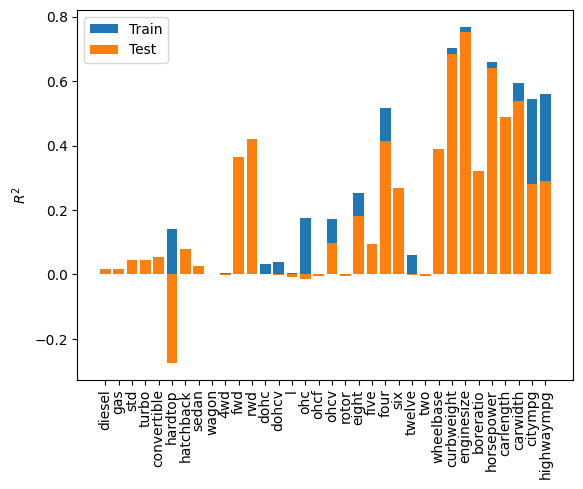

Training R² mean value 0.21817773426877915 | Testing R² mean value 0.18241493035139267
Training R² max value 0.7686929078033782 | Testing R² max value 0.7534902447506853


In [61]:
# Enter your code and run the cell
# Tạo pipeline gồm:
# 1. StandardScaler: Chuẩn hóa dữ liệu về cùng thang đo
# 2. LinearRegression: Mô hình hồi quy tuyến tính
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

# Gọi hàm get_R2_features để tính và vẽ biểu đồ R² của từng feature
# Hàm sẽ cho biết mức độ giải thích của từng biến độc lập khi dùng pipeline trên
get_R2_features(pipe)




<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
    
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
get_R2_features(pipe)
    
```
</details>


## Polynomial Features


### Multiple Features


Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling.
Below, we will perform a second degree (degree=2) polynomial transformation.


In [62]:
# Tạo đối tượng PolynomialFeatures để sinh thêm các đặc trưng (feature) bậc hai
# degree=2: tạo các biến bình phương và tích giữa các biến
# include_bias=False: không thêm cột hằng số (bias term)
poly_features = PolynomialFeatures(degree=2, include_bias=False)


Now, we transform the training and testing data sets.


In [63]:
# Biến đổi dữ liệu huấn luyện và kiểm tra thành dạng đa thức bậc 2
# fit_transform: học và tạo đặc trưng mới cho tập huấn luyện
X_train_poly = poly_features.fit_transform(X_train)

# transform: áp dụng cùng phép biến đổi cho tập kiểm tra
X_test_poly = poly_features.transform(X_test)


`X_train_poly` and `X_test_poly` now contain the original features of X plus the square of these features and the cross-terms combination.
Let's check the shape of the newly created train and test sets.


In [64]:
print(X_train_poly.shape)


(143, 665)


In [27]:
print(X_test_poly.shape)

(62, 665)


Altogether, we have 665 features. Now, we fit the model with the newly created features.


In [28]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


And we make predictions.


In [29]:
predicted = lm.predict(X_train_poly)

Again, we can ckeck the `r2_score()` on both, training and testing data sets.


In [30]:
print("R^2 on training data:", lm.score(X_train_poly, y_train))
print("R^2 on testing data:", lm.score(X_test_poly,y_test))

R^2 on training data: 0.9985318497975858
R^2 on testing data: -36729.95715759443


We see the model has a negative $R^{2}$ on the test data set, this is sign of overfiting.


### Individual Features 


<p>Data Pipelines simplify the steps of processing the data. We use the module <code>Pipeline</code> to create a pipeline. We also use <code>PolynomialFeatures</code> as a step in our pipeline.</p>


In [65]:
# Tạo danh sách các bước (pipeline steps) gồm:
# 1. 'polynomial': tạo đặc trưng đa thức bậc 2 (bao gồm bình phương và tích giữa các biến)
# 2. 'model': mô hình hồi quy tuyến tính
Input = [
    ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
    ('model', LinearRegression())
]


We can repeat the steps above, using the <code>Pipleine</code> object.


In [66]:
# Tạo pipeline từ danh sách các bước đã định nghĩa (Input)
pipe = Pipeline(Input)

# Huấn luyện pipeline:
# Bước 1: tạo đặc trưng đa thức từ dữ liệu huấn luyện
# Bước 2: huấn luyện mô hình hồi quy tuyến tính trên các đặc trưng đó
pipe.fit(X_train, y_train)


,steps,"[('polynomial', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


We can see the results are identical.


In [33]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9985318497975858
R^2 on testing data: -36729.95715759443


We can train our model on each of the features using the Polynomial Feature transform of the second degree. Then we can plot our $R^2$. 


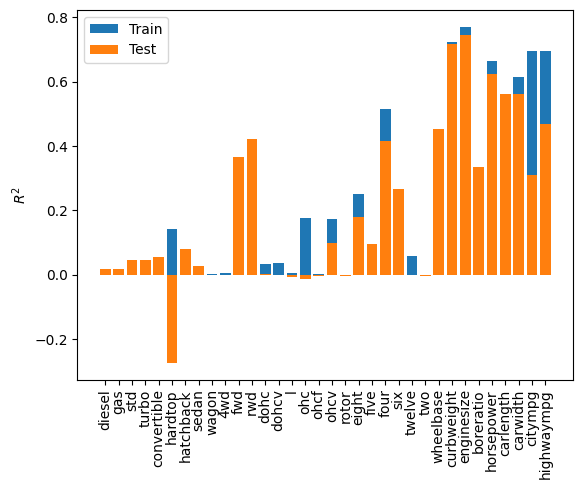

Training R^2 mean value 0.2308414193408703 Testing R^2 mean value 0.1938625522385049 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [34]:
get_R2_features(pipe)

Feature with the max $R^{2}$ is higher than when using all the features.


## GridSearch and  Pipeline


In this section of the notebook, we will define a pipeline object, then use GridSearch to find the best hyper-parameters of the model by using  cross-validation method of the  parameter grid, as shown in the figure below. A 5-fold cross validation is used by default. We will learn more about k-fold cross validation in the next, Cross Validation lesson of the Course.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/images/k-fold.png">
</center>
<center>source scikit-learn.org</center>


We create `PolynomialFeatures()` pipeline.


In [67]:
# Tạo pipeline gồm 3 bước xử lý:
# 1. 'scaler': Chuẩn hóa dữ liệu bằng StandardScaler để đưa các feature về cùng thang đo
# 2. 'polynomial': Sinh thêm các đặc trưng đa thức bậc 2 (bao gồm bình phương và tích giữa các biến)
# 3. 'model': Huấn luyện mô hình hồi quy tuyến tính LinearRegression
Input = [
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
    ('model', LinearRegression())
]

# Tạo pipeline từ danh sách các bước trên
pipe = Pipeline(Input)


To search for the best combination of hyperparameters, we create a  <b>GridSearchCV</b> object with dictionary of parameter values. The parameters of pipelines can be set using the name of the key separated by 
'__', then the parameter name of the key.


In [68]:
# Tạo lưới tham số (param_grid) để thử nghiệm các bậc đa thức khác nhau trong GridSearchCV
# "polynomial__degree": tham chiếu đến tham số 'degree' của bước 'polynomial' trong pipeline
# Thử lần lượt các giá trị 1, 2, 3 để tìm bậc đa thức tối ưu
param_grid = {
    "polynomial__degree": [1, 2, 3]
}


<b>polynomial__degree</b>: is the degree of the polynomial. 




In [69]:
# Tạo đối tượng GridSearchCV để tự động tìm tham số tối ưu cho pipeline
# pipe: pipeline gồm scaler, polynomial features và linear regression
# param_grid: danh sách các giá trị 'degree' cần thử
# n_jobs=1: chỉ sử dụng 1 CPU để chạy (có thể tăng lên để tăng tốc)
search = GridSearchCV(pipe, param_grid, n_jobs=1)



In [38]:
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [39]:
search.fit(X_test, y_test)

,estimator,Pipeline(step...egression())])
,param_grid,"{'polynomial__degree': [1, 2, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable ```best```, as follows:


In [40]:
best=search.best_estimator_
best

,steps,"[('scaler', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,1
,interaction_only,False
,include_bias,False
,order,'C'


We see the degree is one and normalize is <code>Ture </code>.


Now, we test our model on the test data to see the best score.


In [41]:
best.score(X_test,y_test)

0.9681812255199611

Finally, we can plot a distribution of the predicted values versus the actual values. 


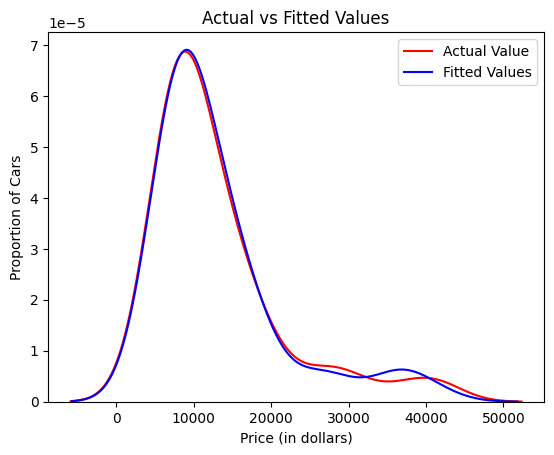

In [70]:
# Dự đoán giá trị đầu ra trên tập kiểm tra bằng mô hình tốt nhất (best)
predicted = best.predict(X_test)

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plot_dis(y_test, predicted)


As we see, the result is almost perfect!


## Exercise 4
In this Exercise, calculate the $R^2$ using the object ```Pipeline``` with ```GridSearch``` for each individual features.


diesel
gas
std
turbo
convertible
hardtop
hatchback
sedan
wagon
4wd
fwd
rwd
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
wheelbase
curbweight
enginesize
boreratio
horsepower
carlength
carwidth
citympg
highwaympg


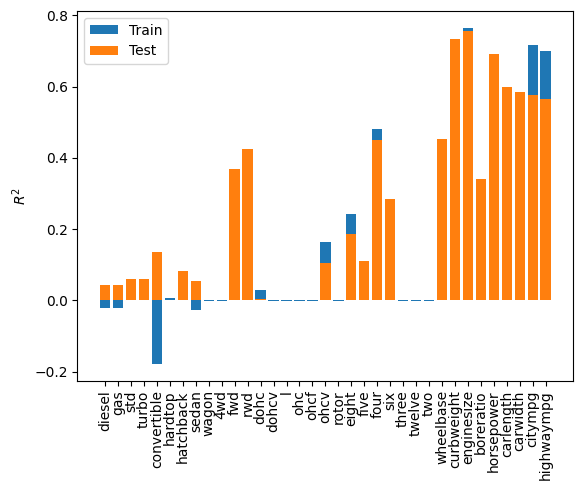

Training R² mean value 0.18703319906685534 | Testing R² mean value 0.22042180897459915
Training R² max value 0.7653236373791239 | Testing R² max value 0.7565151400968062


In [71]:
# Lặp qua từng feature để kiểm tra độ phù hợp R² với mô hình hồi quy đa thức
features = list(X)

R_2_train = []  # Lưu R² của tập huấn luyện
R_2_test = []   # Lưu R² của tập kiểm tra

for feature in features:
    # Lưới tham số: thử các bậc đa thức từ 1 đến 5
    # và kiểm tra tùy chọn hệ số dương (positive=True/False)
    param_grid = {
        "polynomial__degree": [1, 2, 3, 4, 5],
        "model__positive": [True, False]
    }

    # Pipeline gồm 2 bước: sinh đặc trưng đa thức + mô hình hồi quy tuyến tính
    Input = [
        ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
        ('model', LinearRegression())
    ]
    pipe = Pipeline(Input)

    print(feature)

    # Dùng GridSearchCV để tìm tham số tốt nhất cho từng feature
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)  # Huấn luyện với từng feature riêng
    best = search.best_estimator_          # Lấy mô hình tốt nhất

    # Tính R² cho train và test
    R_2_test.append(best.score(X_test[[feature]], y_test))
    R_2_train.append(best.score(X_train[[feature]], y_train))

# Vẽ biểu đồ so sánh R² giữa tập huấn luyện và kiểm tra
plt.bar(features, R_2_train, label="Train")
plt.bar(features, R_2_test, label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()

# In giá trị trung bình và lớn nhất của R²
print("Training R² mean value {} | Testing R² mean value {}".format(
    str(np.mean(R_2_train)), str(np.mean(R_2_test))))
print("Training R² max value {} | Testing R² max value {}".format(
    str(np.max(R_2_train)), str(np.max(R_2_test))))


<details>
<summary><strong>Solution</strong> (Click Here)</summary>

```python    
features=list(X)
   
    
R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)
    best=search.best_estimator_
        
    R_2_test.append(best.score(X_test[[feature]],y_test))
    R_2_train.append(best.score(X_train[[feature]],y_train))
    
        
plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )
```
</details>


# Congratulations! - You have completed the lab


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

[Svitlana Kramar](www.linkedin.com/in/svitlana-kramar)


<!--## Change Log
-->


<!--| Date (YYYY-MM-DD) | Version | Changed By            | Change Description                   |
| ----------------- | ------- | --------------------- | ------------------------------------ |
|   2022-04-15      | 0.1     | Svitlana K.           | Created the first draft |
|   2022-04-18      | 0.1     | Joseph S.             | Updated all content |
|   2022-04-26      | 0.1     | Svitlana K.           | Corrected minor grammar errors |-->

